PROPORTIONS HISTOGRAM ANALYSIS & STATISTICS
Loaded CHARMM27_TIP3P proportions: (5000, 4)
Loaded CHARMM36m_TIP3P proportions: (5000, 4)

Creating histogram plots...


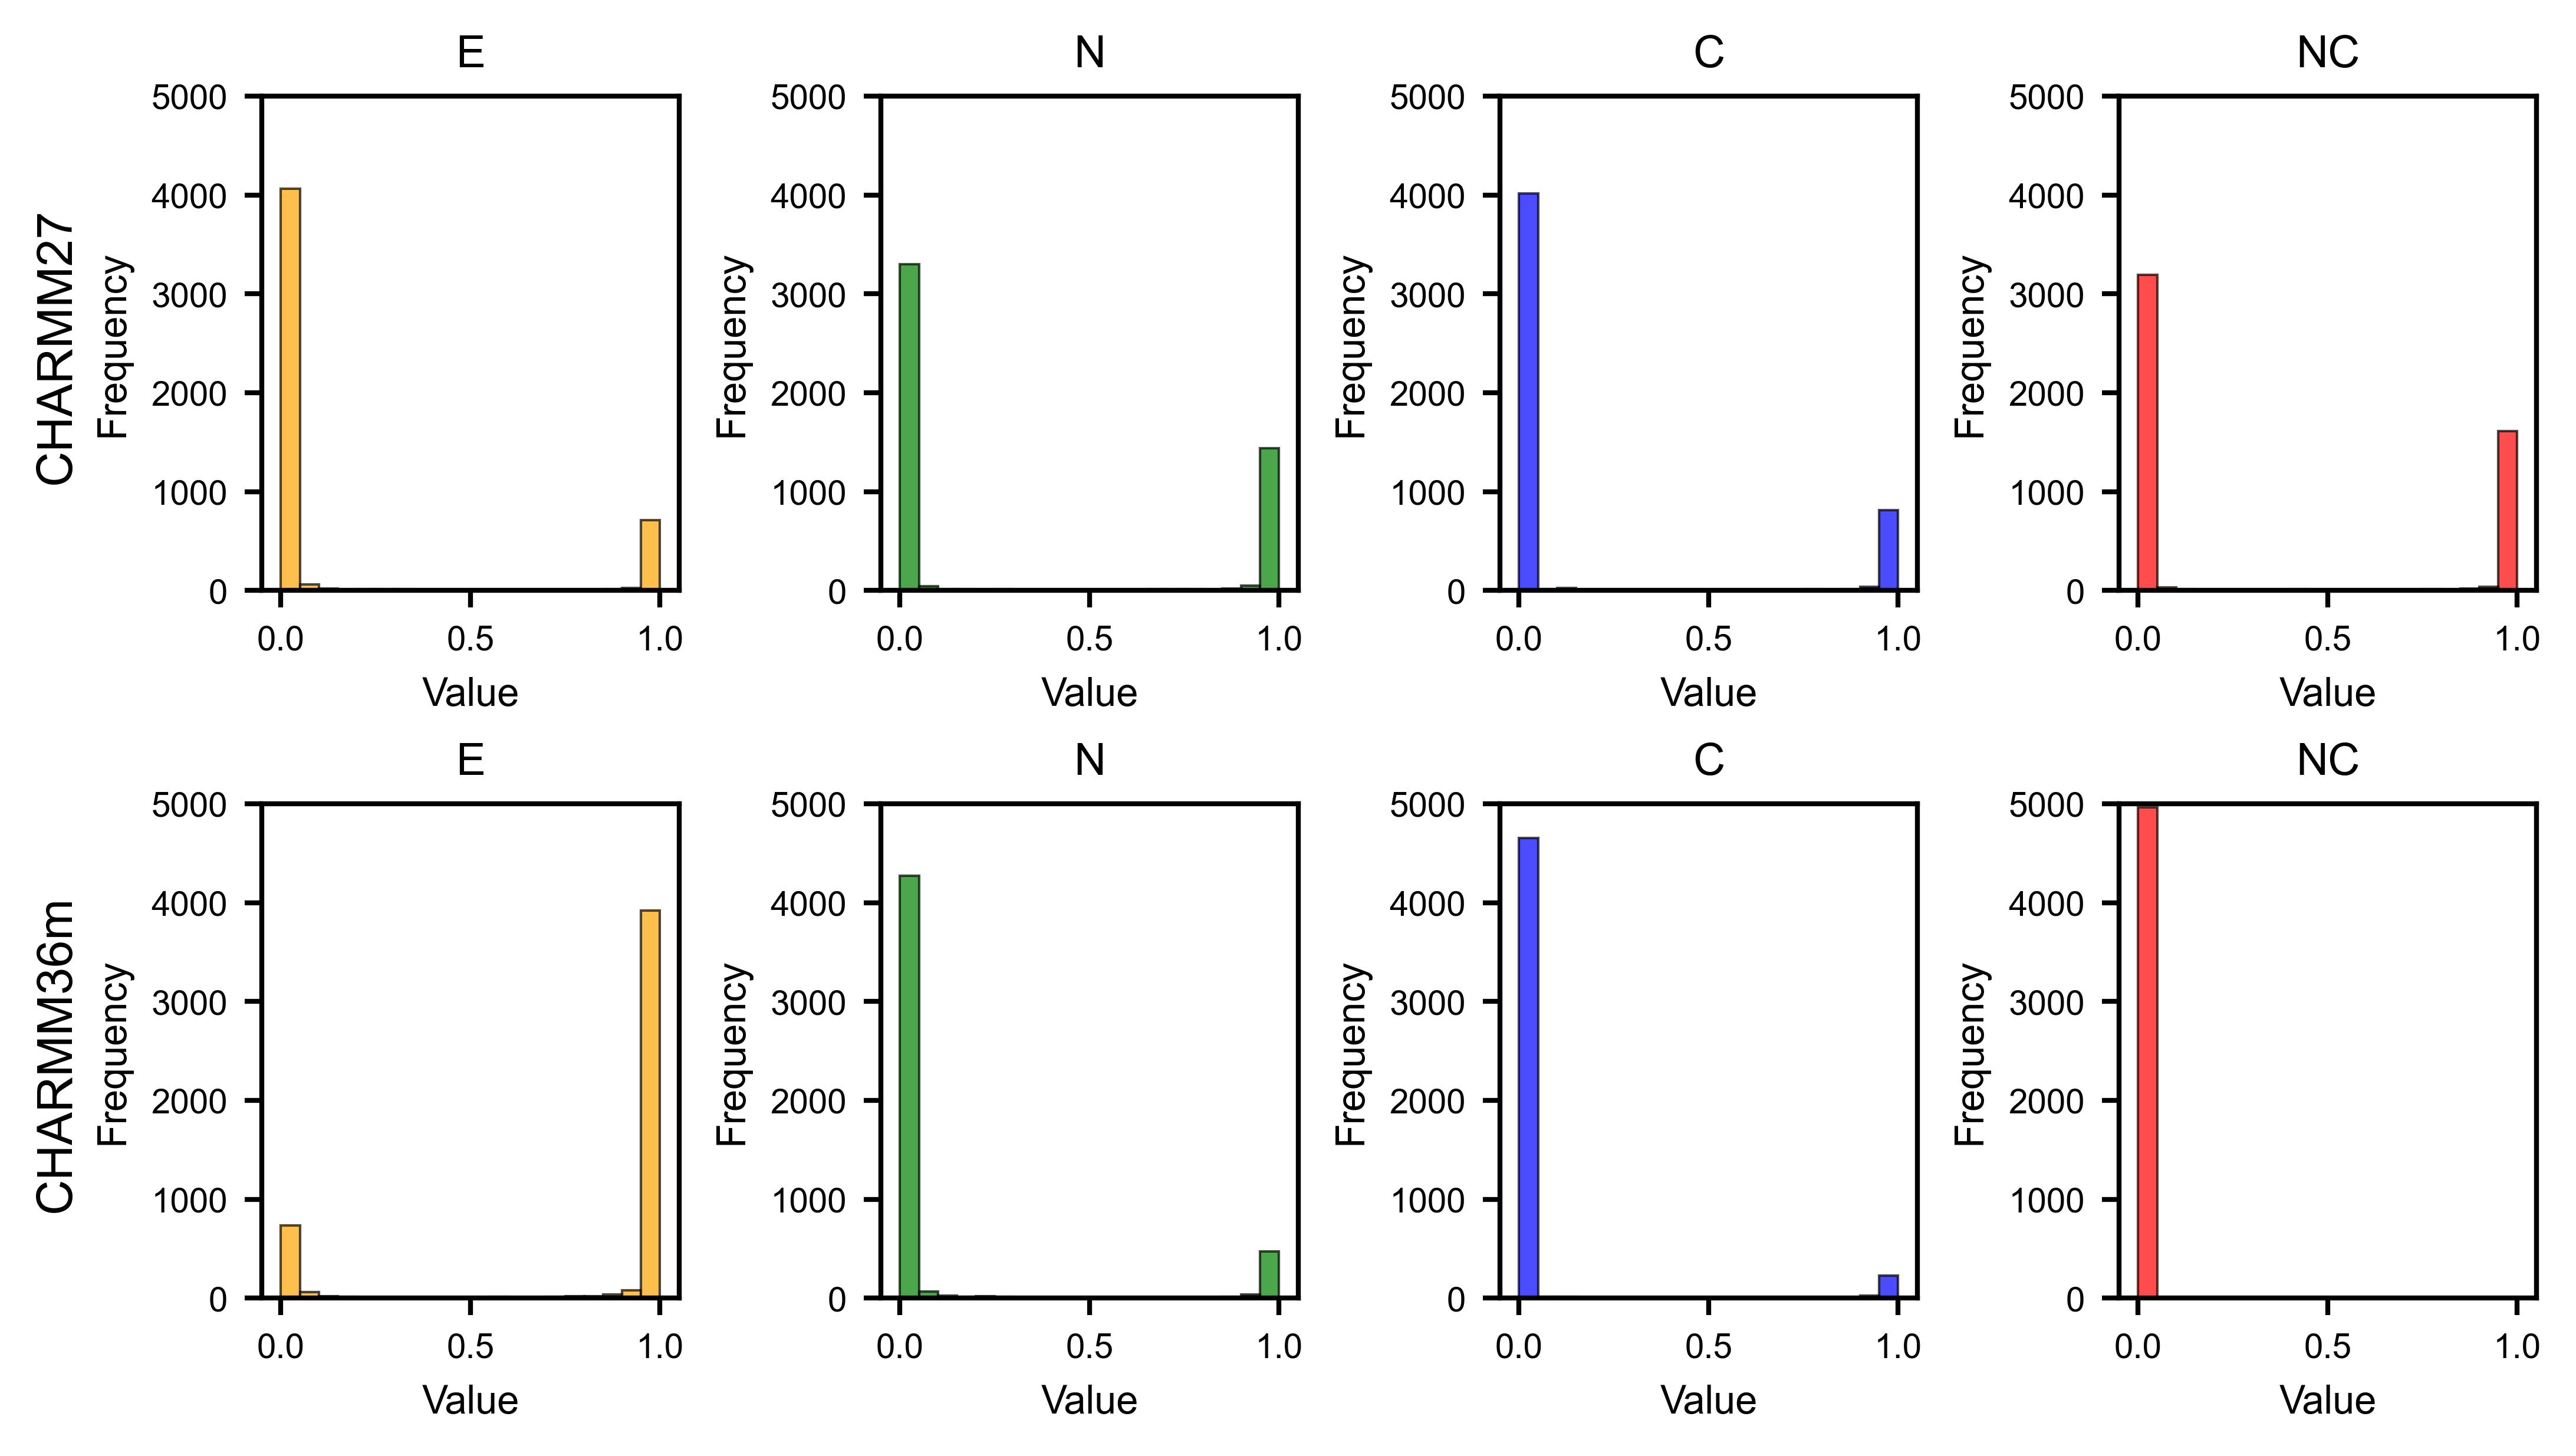

In [1]:
### FRACTIONAL HISTOGRAMS OF STATE POPULATIONS FOR EACH SEGMENT (FIG S10) ###
### 2 Aug 2025 ###

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# -----------------------------------------------------------------------------
# CONFIGURATION
# -----------------------------------------------------------------------------

# Paths
BASE_DIR = Path('../data')
PROP_DIR = BASE_DIR / 'prop_array'

# Data Specifications
FORCE_FIELDS = ['CHARMM27_TIP3P', 'CHARMM36m_TIP3P']
FORCE_FIELD_LABELS = {
    'CHARMM27_TIP3P': 'CHARMM27',
    'CHARMM36m_TIP3P': 'CHARMM36m'
}

# State definitions
STATE_KEYS_ORDERED = ['C', 'E', 'NC', 'N']  # Order in data array
STATE_PLOT_ORDER = ['E', 'N', 'C', 'NC']    # Order for plotting
STATE_COLORS = {'E': 'orange', 'N': 'green', 'C': 'blue', 'NC': 'red'}

# Analysis Parameters
HISTOGRAM_BINS = np.arange(0, 1.05, 0.05)

# Plotting Specifications
FIGURE_SIZE = (7, 4)
DPI = 600
Y_LIMIT = 5000
HISTOGRAM_ALPHA = 0.7

# -----------------------------------------------------------------------------
# DATA LOADING
# -----------------------------------------------------------------------------

def load_proportions_array(force_field):
    """Load proportions array for given force field."""
    filepath = PROP_DIR / force_field / f'proportions_array_0100ps_{force_field}_PAPER.npy'
    
    if not filepath.exists():
        raise FileNotFoundError(f'Missing proportions file: {filepath}')
    
    proportions = np.load(filepath)
    print(f'Loaded {force_field} proportions: {proportions.shape}')
    
    return proportions

# -----------------------------------------------------------------------------
# ANALYSIS
# -----------------------------------------------------------------------------

def extract_state_data(proportions_array, state_label):
    """Extract data for specific state from proportions array."""
    state_index = STATE_KEYS_ORDERED.index(state_label)
    state_data = proportions_array[:, state_index]
    return state_data

# -----------------------------------------------------------------------------
# PLOTTING
# -----------------------------------------------------------------------------

def set_plot_style():
    """Set consistent plot style for ACS publication figures."""
    plt.rcParams.update({
        # Font settings - Arial (PC) or Helvetica (Mac) as per ACS
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'Helvetica'],
        'font.size': 10,  # Will be readable at 5pt when reduced to column width
        
        # Line widths - minimum 1 pt as per ACS
        'lines.linewidth': 1.0,
        'axes.linewidth': 1.0,
        'xtick.major.width': 1.0,
        'ytick.major.width': 1.0,
        'xtick.minor.width': 1.0,
        'ytick.minor.width': 1.0,
        'patch.linewidth': 1.0,
        'grid.linewidth': 1.0,
        
        # Font sizes - accounting for reduction
        'axes.labelsize': 11,
        'axes.titlesize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        
        # DPI settings
        'figure.dpi': 600
    })

def plot_single_histogram(ax, data, state_label, color):
    """Plot histogram for single state."""
    ax.hist(data, bins=HISTOGRAM_BINS, color=color, alpha=HISTOGRAM_ALPHA,
            edgecolor='black', linewidth=0.5)
    
    # Format axes
    ax.set_xlabel('Value', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.set_title(state_label, fontsize=9)
    ax.set_ylim(0, Y_LIMIT)
    ax.tick_params(labelsize=7)

def add_force_field_labels(fig):
    """Add force field labels to the side of the figure."""
    fig.text(0, 0.77, FORCE_FIELD_LABELS['CHARMM27_TIP3P'], 
             fontsize=10, ha='right', va='center', rotation=90)
    fig.text(0, 0.27, FORCE_FIELD_LABELS['CHARMM36m_TIP3P'], 
             fontsize=10, ha='right', va='center', rotation=90)

def create_histograms_figure(all_data):
    """Create complete 2x4 histogram figure."""
    fig, axes = plt.subplots(2, 4, figsize=FIGURE_SIZE, 
                            constrained_layout=True, dpi=DPI)
    
    for row, force_field in enumerate(FORCE_FIELDS):
        proportions = all_data[force_field]
        
        for col, state_label in enumerate(STATE_PLOT_ORDER):
            ax = axes[row, col]
            state_data = extract_state_data(proportions, state_label)
            color = STATE_COLORS[state_label]
            
            plot_single_histogram(ax, state_data, state_label, color)
    
    # Add force field labels
    add_force_field_labels(fig)
    
    return fig

# -----------------------------------------------------------------------------
# MAIN
# -----------------------------------------------------------------------------

def main():
    """Main function to run proportions histogram analysis."""
    set_plot_style()
    
    print('PROPORTIONS HISTOGRAM ANALYSIS & STATISTICS')
    print('=' * 60)
    
    try:
        # Load all data
        all_data = {}
        for force_field in FORCE_FIELDS:
            proportions = load_proportions_array(force_field)
            all_data[force_field] = proportions
        
        # Create histogram figure
        print('\nCreating histogram plots...')
        fig = create_histograms_figure(all_data)
        
        # Display figure
        plt.show()
                
    except Exception as e:
        print(f'Error during analysis: {e}')
        raise

if __name__ == '__main__':
    main()